In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['thompson', 'rikitea', 'ilulissat', 'kruisfontein', 'clyde river', 'gamba', 'bredasdorp', 'puerto ayora', 'belushya guba', 'esperance', 'ahipara', 'mataura', 'saskylakh', 'yumen', 'yellowknife', 'new norfolk', 'hilo', 'amderma', 'kaitangata', 'illoqqortoormiut', 'butaritari', 'bereda', 'pastavy', 'hithadhoo', 'busselton', 'voyvozh', 'port elizabeth', 'bengkulu', 'mhango', 'cape town', 'jamestown', 'zambezi', 'davidson', 'geraldton', 'ribeira grande', 'saint george', 'charters towers', 'codrington', 'ayan', 'attawapiskat', 'ushuaia', 'port alfred', 'albany', 'kahului', 'igarka', 'hermanus', 'kitsuki', 'mandalgovi', 'bluff', 'kapaa', 'saldanha', 'zhezkazgan', 'touros', 'sao filipe', 'mpika', 'cherskiy', 'constitucion', 'atuona', 'mys shmidta', 'barentsburg', 'coos bay', 'troitsko-pechorsk', 'hobart', 'maloye kozino', 'punta arenas', 'vaini', 'faanui', 'moranbah', 'taolanaro', 'harper', 'hasaki', 'lebu', 'arraial do cabo', 'zonguldak', 'palabuhanratu', 'castro', 'egvekinot', 'khatanga', 

In [3]:
# # Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country =[]
city_name = []
lat = []
lng = []
index_counter = 0
set_counter = 1
# Create for loop for temperatures in city list
for city in cities:
    try:      
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter +1
        
        else:
            index_counter = index_counter + 1
            
        print(f'Processing record {index_counter} of set {set_counter} : {city}')
       
        
    except (KeyError, IndexError):
        print('City not found')
        


Processing record 1 of set 1 : thompson
Processing record 2 of set 1 : rikitea
Processing record 3 of set 1 : ilulissat
Processing record 4 of set 1 : kruisfontein
Processing record 5 of set 1 : clyde river
Processing record 6 of set 1 : gamba
Processing record 7 of set 1 : bredasdorp
Processing record 8 of set 1 : puerto ayora
City not found
Processing record 9 of set 1 : esperance
Processing record 10 of set 1 : ahipara
Processing record 11 of set 1 : mataura
Processing record 12 of set 1 : saskylakh
Processing record 13 of set 1 : yumen
Processing record 14 of set 1 : yellowknife
Processing record 15 of set 1 : new norfolk
Processing record 16 of set 1 : hilo
City not found
Processing record 17 of set 1 : kaitangata
City not found
Processing record 18 of set 1 : butaritari
Processing record 19 of set 1 : bereda
Processing record 20 of set 1 : pastavy
Processing record 21 of set 1 : hithadhoo
Processing record 22 of set 1 : busselton
Processing record 23 of set 1 : voyvozh
Processing

Processing record 40 of set 4 : kupino
City not found
Processing record 41 of set 4 : redencao
Processing record 42 of set 4 : chokurdakh
Processing record 43 of set 4 : los llanos de aridane
Processing record 44 of set 4 : pangnirtung
Processing record 45 of set 4 : douglas
Processing record 46 of set 4 : oriximina
Processing record 47 of set 4 : miranda
Processing record 48 of set 4 : pangody
Processing record 49 of set 4 : nhulunbuy
Processing record 50 of set 4 : bubaque
Processing record 0 of set 5 : santa rosa
Processing record 1 of set 5 : kismayo
Processing record 2 of set 5 : anadyr
Processing record 3 of set 5 : port blair
Processing record 4 of set 5 : sarkand
Processing record 5 of set 5 : resistencia
Processing record 6 of set 5 : airai
Processing record 7 of set 5 : bethel
Processing record 8 of set 5 : bonthe
Processing record 9 of set 5 : batagay-alyta
Processing record 10 of set 5 : vernon
Processing record 11 of set 5 : dongsheng
Processing record 12 of set 5 : croton

In [4]:
# Create DataFrame of cities in list
city_dict = {'Cities': city_name,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Max Temperature': max_temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed,
                          'Country': country,
                          'Date': date}
for k,v in city_dict.items():
    print(k,len(v))




cities_df = pd.DataFrame(city_dict)
cities_df['Date'] = pd.to_datetime(cities_df['Date'],unit='s')
cities_df

Cities 248
Latitude 248
Longitude 248
Max Temperature 248
Humidity 248
Cloudiness 248
Wind Speed 248
Country 248
Date 248


,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,69.96,56,75,4.61,CA,2021-07-28 01:55:12
1,Rikitea,-23.1203,-134.9692,74.03,78,100,15.28,PF,2021-07-28 01:54:32
2,Ilulissat,69.2167,-51.1000,46.81,80,100,8.41,GL,2021-07-28 01:55:11
3,Kruisfontein,-34.0033,24.7314,53.89,84,35,14.23,ZA,2021-07-28 01:55:20
4,Clyde River,70.4692,-68.5914,46.63,81,90,8.05,CA,2021-07-28 01:56:55
...,...,...,...,...,...,...,...,...,...
243,Igrim,63.1906,64.4162,47.14,74,56,7.78,RU,2021-07-28 01:58:10
244,Euclides da Cunha,-10.5075,-39.0158,63.61,97,8,4.34,BR,2021-07-28 01:58:41
245,Port Macquarie,-31.4333,152.9167,74.89,37,1,9.69,AU,2021-07-28 01:55:12
246,Oranjemund,-28.5500,16.4333,52.66,83,0,4.59,NA,2021-07-28 01:56:42


In [5]:
# Output to CSV
cities_df.to_csv("../cities_output_student.csv", encoding="utf-8", index=False) 

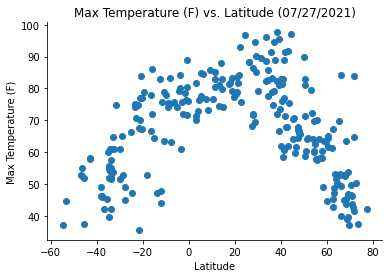

In [6]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Max Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature (F) vs. Latitude (07/27/2021)')
plt.savefig("Max Temperature.png")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This first plot shows the relationship of Latitude vs. Max Temperature.
# It seems to show warmer temperatures around the Equator or 0 Latitude mark.

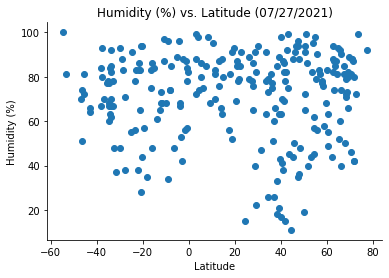

In [7]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude (07/27/2021)')
plt.savefig("Humidity.png")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows Humidity vs. Latitude and seems to show no correlation.

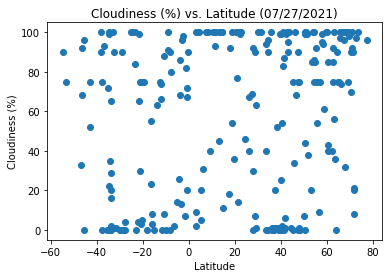

In [8]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude (07/27/2021)')
plt.savefig("Cloudiness.png")
# This plot shows Cloudiness vs. Latitude and seems to have no correlation.

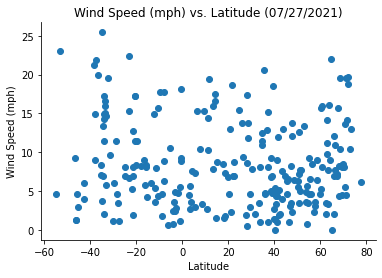

In [9]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude (07/27/2021)')
plt.savefig("Wind Speed.png")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows Wind Speed vs. Latitude and seems to have no correlation.

In [10]:
# # Create Northern Hemisphere dataframe
northern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) < 0, :]
northern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Rikitea,-23.1203,-134.9692,74.03,78,100,15.28,PF,2021-07-28 01:54:32
3,Kruisfontein,-34.0033,24.7314,53.89,84,35,14.23,ZA,2021-07-28 01:55:20
5,Gamba,-2.6500,10.0000,72.01,88,98,2.80,GA,2021-07-28 01:55:31
6,Bredasdorp,-34.5322,20.0403,54.72,67,100,6.91,ZA,2021-07-28 01:55:27
7,Puerto Ayora,-0.7393,-90.3518,71.49,84,20,9.24,EC,2021-07-28 01:52:49
...,...,...,...,...,...,...,...,...,...
236,Jacareacanga,-6.2222,-57.7528,75.58,48,2,0.69,BR,2021-07-28 01:57:16
237,Samarai,-10.6167,150.6667,78.96,87,88,15.73,PG,2021-07-28 01:55:11
244,Euclides da Cunha,-10.5075,-39.0158,63.61,97,8,4.34,BR,2021-07-28 01:58:41
245,Port Macquarie,-31.4333,152.9167,74.89,37,1,9.69,AU,2021-07-28 01:55:12


In [11]:
# Create Southern Hemisphere dataframe
southern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) > 0, :]
southern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,69.96,56,75,4.61,CA,2021-07-28 01:55:12
2,Ilulissat,69.2167,-51.1000,46.81,80,100,8.41,GL,2021-07-28 01:55:11
4,Clyde River,70.4692,-68.5914,46.63,81,90,8.05,CA,2021-07-28 01:56:55
11,Saskylakh,71.9167,114.0833,64.78,42,20,19.73,RU,2021-07-28 01:56:15
12,Yumen,40.2833,97.2000,82.08,17,0,5.46,CN,2021-07-28 01:55:52
...,...,...,...,...,...,...,...,...,...
240,Ottappālam,10.7667,76.3833,76.75,95,100,2.73,IN,2021-07-28 01:58:40
241,Inírida,3.8653,-67.9239,72.95,98,100,3.60,CO,2021-07-28 01:58:41
242,Coahuayana Viejo,18.7333,-103.6833,79.21,91,100,1.77,MX,2021-07-28 01:57:51
243,Igrim,63.1906,64.4162,47.14,74,56,7.78,RU,2021-07-28 01:58:10


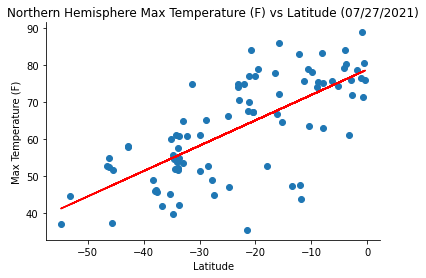

In [12]:
# Northern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Northern Hemisphere Max Temperature.png")
plt.title('Northern Hemisphere Max Temperature (F) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows that there is a moderately positive correlation between Latitude and Max Temperature in the Northern Hemisphere.
# The greater the latitude below zero, the higher the temperature.

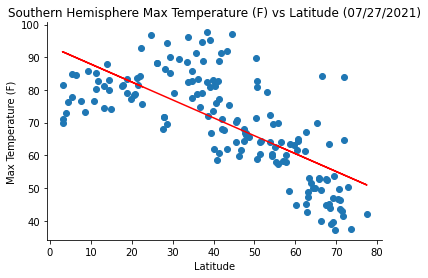

In [13]:
# Southern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Southern Hemisphere Max Temperature.png")
plt.title('Southern Hemisphere Max Temperature (F) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows there is a moderate negative correlation between Latitude and Temperature in the Southern Hemisphere.
# The greater the latitude, the lower the temperature.

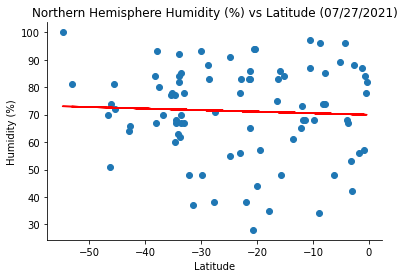

In [14]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Northern Hemisphere Humidity (%).png")
plt.title('Northern Hemisphere Humidity (%) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows that there is no correlation between Humidity and Latitude in the Northern Hemisphere.

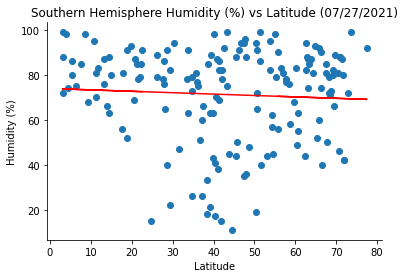

In [15]:
# Southern Hemisphere Humidity vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Southern Hemisphere Humidity (%).png")
plt.title('Southern Hemisphere Humidity (%) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows that there is no correlation between Humidity and Latitude in the Southern Hemisphere.

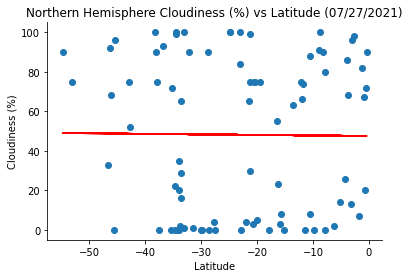

In [16]:
# Northern Hemisphere Cloudiness vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Northern Hemisphere Cloudiness (%).png")
plt.title('Northern Hemisphere Cloudiness (%) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows that there is no correlation between Cloudiness and Latitude in the Northern Hemisphere.

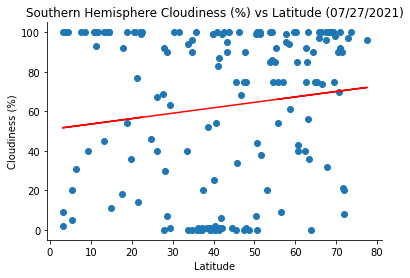

In [17]:
# Southern Hemisphere Cloudiness vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Southern Hemisphere Cloudiness (%).png")
plt.title('Southern Hemisphere Cloudiness (%) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows that there is no correlation between Cloudiness and Latitude in the Southern Hemisphere.

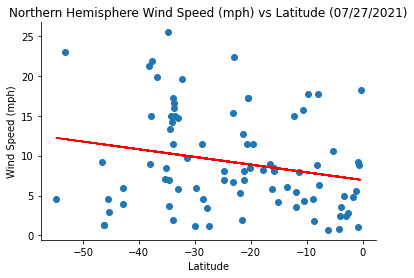

In [18]:
# Northern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Northern Hemisphere Wind Speed (mph).png")
plt.title('Northern Hemisphere Wind Speed (mph) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows that there is a weak negative correlation between Wind Speed and Latitude in the Northern Hemisphere.

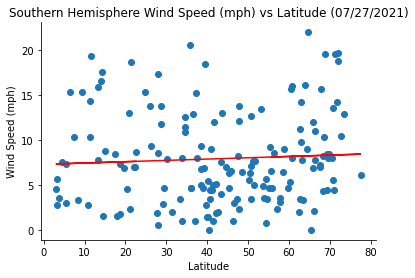

In [19]:
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Southern Hemisphere Wind Speed (mph).png")
plt.title('Southern Hemisphere Wind Speed (mph) vs Latitude (07/27/2021)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# This plot shows that there is no correlation between Wind Speed and Latitude in the Southern Hemisphere.